In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **ML Feature Selection Techniques | Breast Cancer Diagnosis**
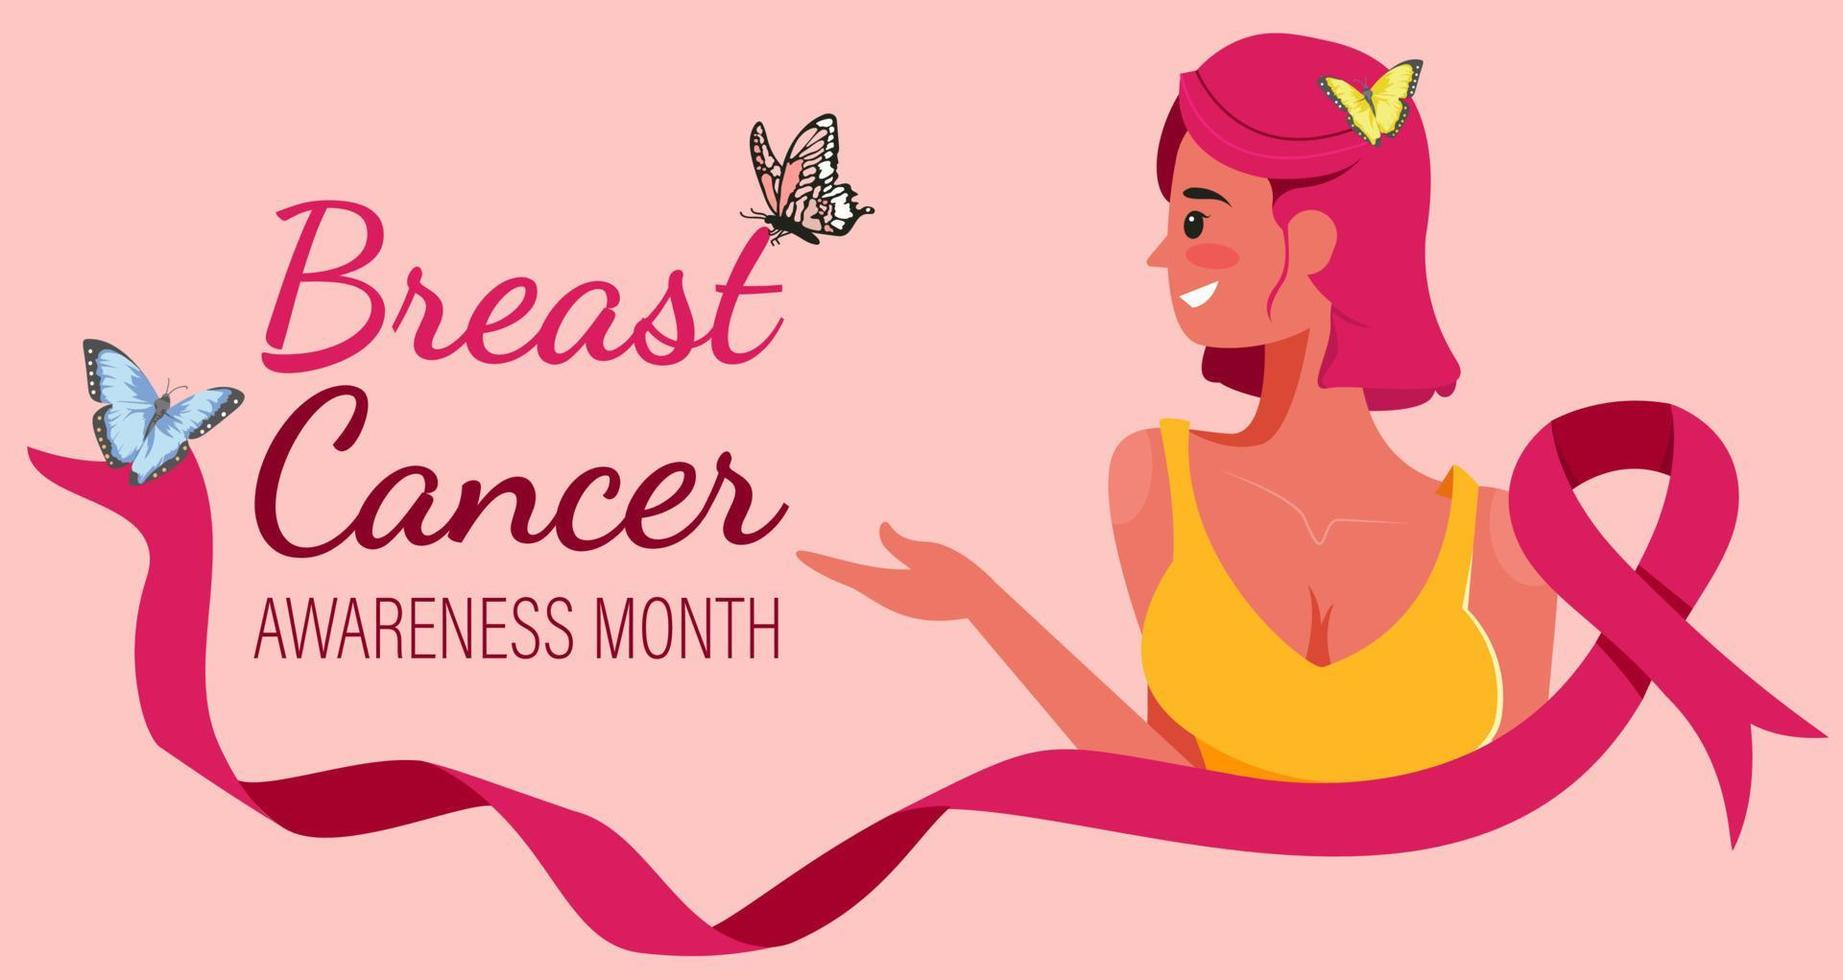

## <font color=#dd3558> In this Project we will cover following sections
* **Import Dataset using pandas.read_csv**
* **Visualization of dataset in different ways and check for null values, undesired columns and remove them**
* **Declare the dependent (y) and independent (X) parameters from the dataset**
* **Convert the dependent (y) parameter into 0,1 using a label encoder to classify it not two classes**
* **Use a Standard scaler to normally distribute the data**
* **Train the model and check the accuracy without reducing the learning parameters**
* **Apply Different correlation Techniques to reduce the learning parameter**  
* **Filter Method:**

    i)  Pearson Correlation Coefficient
    
   ii) Spearman’s Rank Correlation Coefficient
   
  iii) Kendall’s Rank Correlation Coefficient
* **Statistical and Ranking Filter Method:**

    i) Mutual Information or Information Gain
    
   ii) ANNOVA Univariate Test
* **Wrapper Method:**

    i) Step Forward Feature Selection
    
   ii) Step Backward Feature Selection
   
  iii) Step Floating Forward Feature Selection
  
   iv) Step Floating Backward Feature Selection
* **Train the model and check the accuracy after reducing the learning parameters**
* **Do the above step for all the feature selection technique**
* **Compare the correlation technique using a Bar graph and ROC curve**


## <font color=#dd3558> Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, mutual_info_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import mutual_info_classif as MIC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
#importing the dataset and displaying above 5 rows
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

## <font color=#dd3558> Visualization in different ways

In [ ]:
df.shape #shape of out dataset

In [ ]:
df.isnull().sum()#checking for nulls

In [ ]:
df.describe() #displaying statistical data of our dataset

In [ ]:
#dropping the id and Unnamed: 32 columns as it will not contirbute to the training of model
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
#Value counts of the target column diagnosis
df['diagnosis'].value_counts()

## <font color=#dd3558> Convert the dependent (y) parameter into 0,1

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df['diagnosis'].unique()

In [ ]:
#plotting heatmap to see the correlation of the features of the dataset
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## <font color=#dd3558>Declare the dependent (y) and independent (X) parameters from the dataset

In [ ]:
#splitting the dataset into X (independent) and y (dependent) 
data = np.array(df)
Y, X = np.split(data,[1],axis=1)
X_train,X_test,y_train,y_test = tts(X,Y,test_size=0.3,random_state=40)

## <font color=#dd3558>Using Standard scaler to normally distribute the data

In [ ]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## <font color=#dd3558> Train and check accuracy

In [ ]:
#running our GaussianNB algorithm to check the accuracy (without feature selection)
model = GaussianNB()
model.fit(X_train,np.ravel(y_train))
predict = model.predict(X_test)
accuracy = accuracy_score(y_test,predict)
print('Accuracy without feature selection:',accuracy)
classif_report = pd.DataFrame(classification_report(y_test, predict, output_dict=True))
classif_report

In [ ]:
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.grid(False)
plt.show()

## <font color=#dd3558> Applying Feature Selection Techniques and Training

**FEATURE SELECTION TECHNIQUES USED:**
1. Filter Method: a) Pearson Correlation Coefficient
                  b) Spearman's Rank Correlation Coefficient
                  c) Kendall's Rank Correlation Cofficient
2. Statistical and Ranking Filter Methods: a) Mutual Information or Information Gain
                                      b) ANNOVA Univariate Test
3. Wrapper Method: 
                   a) Step Forward Feature Selection                                          
                   b) Step Backward Feature Selection
                   c) Step Floating Forward Feature Selection
                   d) Step Floating Backward Feature Selection

### <font color=#dd3558> Filter Method
    
    a) Pearson Correlation Coefficient

In [ ]:
pcc_X_train = pd.DataFrame(X_train)
pcc_X_test = pd.DataFrame(X_test)
pcc_matrix = pcc_X_train.corr(method = "pearson")
pcc_features = set()
for i in range(len(pcc_matrix)):
    for j in range(i):
        if(abs(pcc_matrix.iloc[i,j]>0.9)):
            column = pcc_matrix.columns[i]
            pcc_features.add(column)
print('Features selected for Pearson Correlation Coefficient method:',pcc_features)
pcc_X_train.drop(labels = pcc_features, axis = 1, inplace=True)
pcc_X_test.drop(labels = pcc_features, axis = 1, inplace=True)

In [ ]:
pcc_model = GaussianNB()
pcc_model.fit(pcc_X_train,np.ravel(y_train))
pcc_predict = pcc_model.predict(pcc_X_test)
pcc_accuracy = accuracy_score(y_test,pcc_predict)
print('Accuracy with Pearson Correlation Coefficient:',pcc_accuracy)
pcc_report = pd.DataFrame(classification_report(y_test, pcc_predict, output_dict=True))
pcc_report

In [ ]:
cm = confusion_matrix(y_test, pcc_predict, labels=pcc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pcc_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558> Filter Method
    
    b) Spearman's Rank Correlation Coefficient

In [ ]:
src_X_train = pd.DataFrame(X_train)
src_X_test = pd.DataFrame(X_test)
src_matrix = src_X_train.corr(method = "spearman")
src_features = set()
for i in range(len(src_matrix)):
    for j in range(i):
        if(abs(src_matrix.iloc[i,j]>0.8)):
            column = src_matrix.columns[i]
            src_features.add(column)
print('Features selected for Spearmans Rank Correlation method',src_features)
src_X_train.drop(labels = src_features, axis = 1, inplace=True)
src_X_test.drop(labels = src_features, axis = 1, inplace=True)

In [ ]:
src_model = GaussianNB()
src_model.fit(src_X_train,np.ravel(y_train))
src_predict = src_model.predict(src_X_test)
src_accuracy = accuracy_score(y_test,src_predict)
print('Accuracy with Spearmans Rank Correlation Coefficient:',src_accuracy)
src_report = pd.DataFrame(classification_report(y_test, src_predict, output_dict=True))
src_report

In [ ]:
cm = confusion_matrix(y_test, src_predict, labels=src_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=src_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558> Filter Method
    
    c) Kendall's Rank Correlation Coefficient

In [ ]:
krc_X_train = pd.DataFrame(X_train)
krc_X_test = pd.DataFrame(X_test)
krc_matrix = krc_X_train.corr(method = "kendall")
krc_features = set()
for i in range(len(krc_matrix)):
    for j in range(i):
        if(abs(krc_matrix.iloc[i,j]>0.8)):
            column = krc_matrix.columns[i]
            krc_features.add(column)
print('Features selected for Kendalls Rank Correlation method',krc_features)
krc_X_train.drop(labels = krc_features, axis = 1, inplace=True)
krc_X_test.drop(labels = krc_features, axis = 1, inplace=True)

In [ ]:
krc_model = GaussianNB()
krc_model.fit(krc_X_train,np.ravel(y_train))
krc_predict = krc_model.predict(krc_X_test)
krc_accuracy = accuracy_score(y_test,krc_predict)
print('Accuracy with Kendalls Rank Correlation Coefficient:',krc_accuracy)
krc_report = pd.DataFrame(classification_report(y_test, krc_predict, output_dict=True))
krc_report

In [ ]:
cm = confusion_matrix(y_test, krc_predict, labels=krc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=krc_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Statistical and Ranking Filter Methods
    
    a) Mutual Information or Information Gain

In [ ]:
mic_scores = MIC(X,np.ravel(Y))
print('Estimated mutual information between each feature and the target\n',mic_scores)
mutual_info = pd.Series(mic_scores)
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8)) #bar graph to check Estimated mutual information between each feature and the target.

In [ ]:
mic_score_selected = np.where(mic_scores > 0.2)
print('Selected features where mutual information > 0.2',mic_score_selected)
mic_X = np.delete(X,[1,4,8,9,11,14,15,16,17,18,19,21,24,28,29],axis = 1)
mic_X_train, mic_X_test, mic_y_train, mic_y_test = tts(mic_X,Y, random_state = 0, stratify = Y)

In [ ]:
mic_model = GaussianNB()
mic_model.fit(mic_X_train,np.ravel(mic_y_train))
mic_predict = mic_model.predict(mic_X_test)
mic_accuracy = accuracy_score(mic_y_test,mic_predict)
print('Accuracy with Mutual Information:',mic_accuracy)
mic_report = pd.DataFrame(classification_report(mic_y_test, mic_predict, output_dict=True))
mic_report

In [ ]:
cm = confusion_matrix(mic_y_test, mic_predict, labels=mic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mic_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Statistical and Ranking Filter Methods
    
    b) ANNOVA Univariate Test

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, np.ravel(y_train))
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('F-value of the features')
plt.show() #bar graph to analyze f-statitic value for each feature

In [ ]:
fs = SelectKBest(score_func=f_classif, k=18) #selecting 18 best features
fs.fit(X_train, np.ravel(y_train))
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
annova_model = GaussianNB()
annova_model.fit(X_train_fs,np.ravel(y_train))
annova_predict = annova_model.predict(X_test_fs)
annova_accuracy = accuracy_score(y_test,annova_predict)
print('Accuracy with ANNOVA Univariate Test:',annova_accuracy)
annova_report = pd.DataFrame(classification_report(y_test, annova_predict, output_dict=True))
annova_report

In [ ]:
cm = confusion_matrix(y_test, annova_predict, labels=annova_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=annova_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Wrapper Method
    a) Step Forward Feature Selection

In [ ]:
X_train_wrap,X_test_wrap,y_train_wrap,y_test_wrap = tts(X,Y,test_size=0.2) #splitting the dataset

In [ ]:
sfs = SFS(GaussianNB(), k_features = 15, forward = True, floating = False, verbose = 2, scoring = 'accuracy',cv=0)
sfs.fit(X_train_wrap, np.ravel(y_train_wrap))
sffs = sfs.transform(X_train_wrap)

In [ ]:
sf_model = GaussianNB()
sf_model.fit(sffs,np.ravel(y_train_wrap))
sf_predict = sf_model.predict(sfs.transform(X_test_wrap))
sf_accuracy = accuracy_score(y_test_wrap,sf_predict)
print('Accuracy with Step Forward Feature Selection:',sf_accuracy)
sf_report = pd.DataFrame(classification_report(y_test_wrap, sf_predict, output_dict=True))
sf_report

In [ ]:
cm = confusion_matrix(y_test_wrap, sf_predict, labels=sf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sf_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Wrapper Method
    b) Step Backward Feature Selection

In [ ]:
sbs = SFS(GaussianNB(), k_features = 24, forward = False, floating = False, verbose = 2, scoring = 'accuracy',cv=0)
sbs.fit(X_train_wrap, np.ravel(y_train_wrap))
sbfs = sbs.transform(X_train_wrap)

In [ ]:
sb_model = GaussianNB()
sb_model.fit(sbfs,np.ravel(y_train_wrap))
sb_predict = sb_model.predict(sbs.transform(X_test_wrap))
sb_accuracy = accuracy_score(y_test_wrap,sb_predict)
print('Accuracy with Step Backward Feature Selection:',sb_accuracy)
sb_report = pd.DataFrame(classification_report(y_test_wrap, sb_predict, output_dict=True))
sb_report

In [ ]:
cm = confusion_matrix(y_test_wrap, sb_predict, labels=sb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sb_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Wrapper Method
    c) Step Floating Forward Feature Selection

In [ ]:
sfloat = SFS(GaussianNB(), k_features = 15, forward = True, floating = True, verbose = 2, scoring = 'accuracy',cv=0)
sfloat.fit(X_train_wrap, np.ravel(y_train_wrap))
sfloat_fw = sfloat.transform(X_train_wrap)

In [ ]:
sfloat_model = GaussianNB()
sfloat_model.fit(sfloat_fw,np.ravel(y_train_wrap))
sfloat_predict = sfloat_model.predict(sfloat.transform(X_test_wrap))
sfloat_accuracy = accuracy_score(y_test_wrap,sfloat_predict)
print('Accuracy with Step Floating Forward Feature Selection:',sfloat_accuracy)
sfloat_report = pd.DataFrame(classification_report(y_test_wrap, sfloat_predict, output_dict=True))
sfloat_report

In [ ]:
cm = confusion_matrix(y_test_wrap, sfloat_predict, labels=sfloat_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sfloat_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Wrapper Method
    d) Step Floating Backward Feature Selection

In [ ]:
sfloatbw = SFS(GaussianNB(), k_features = 12, forward = False, floating = True, verbose = 2, scoring = 'accuracy',cv=0)
sfloatbw.fit(X_train_wrap, np.ravel(y_train_wrap))
sfloat_bw = sfloatbw.transform(X_train_wrap)

In [ ]:
sfloatbw_model = GaussianNB()
sfloatbw_model.fit(sfloat_bw,np.ravel(y_train_wrap))
sfloatbw_predict = sfloatbw_model.predict(sfloatbw.transform(X_test_wrap))
sfloatbw_accuracy = accuracy_score(y_test_wrap,sfloatbw_predict)
print('Accuracy with Step Floating Backward Feature Selection:',sfloatbw_accuracy)
sfloatbw_report = pd.DataFrame(classification_report(y_test_wrap, sfloatbw_predict, output_dict=True))
sfloatbw_report

In [ ]:
cm = confusion_matrix(y_test_wrap, sfloatbw_predict, labels=sfloatbw_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sfloatbw_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

### <font color=#dd3558>Comparisons
#### <font color=#dd3558>ROC Curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,predict)
plt.plot(fpr, tpr)
fpr_pcc, tpr_pcc, _ = metrics.roc_curve(y_test,pcc_predict)
plt.plot(fpr_pcc, tpr_pcc)
fpr_src, tpr_src, _ = metrics.roc_curve(y_test,src_predict)
plt.plot(fpr_src, tpr_src)
fpr_krc, tpr_krc, _ = metrics.roc_curve(y_test,krc_predict)
plt.plot(fpr_krc, tpr_krc)
fpr_mic, tpr_mic, _ = metrics.roc_curve(mic_y_test,mic_predict)
plt.plot(fpr_mic, tpr_mic)
fpr_annova, tpr_annova, _ = metrics.roc_curve(y_test,annova_predict)
plt.plot(fpr_annova, tpr_annova)
fpr_sf, tpr_sf, _ = metrics.roc_curve(y_test_wrap,sf_predict)
plt.plot(fpr_sf, tpr_sf)
fpr_sb, tpr_sb, _ = metrics.roc_curve(y_test_wrap,sb_predict)
plt.plot(fpr_sb, tpr_sb)
fpr_sfloar, tpr_sfloat, _ = metrics.roc_curve(y_test_wrap,sfloat_predict)
plt.plot(fpr_sfloar, tpr_sfloat)
fpr_sfloatbw, tpr_sfloatbw, _ = metrics.roc_curve(y_test_wrap,sfloatbw_predict)
plt.plot(fpr_sfloatbw, tpr_sfloatbw)
plt.title('ROC Curve')
plt.legend(['Without Feature Selection','Pearson correlation','Spearmans rank Correlation','Kendalls rank Correlation', 'Mutual Information', 'ANNOVA Univariate', 'Step Forward Feature Selection','Step Backward Feature Selection','Step Floating Forward Feature Selection','Step Floating Backward Feature Selection'])

### <font color=#dd3558>Comparisons
#### <font color=#dd3558>Accuracy Comparison

In [ ]:
x_labels = ['Without Feature Selection','Pearson correlation','Spearmans rank Correlation','Kendalls rank Correlation', 'Mutual Information', 'ANNOVA Univariate', 'Step Forward Feature Selection','Step Backward Feature Selection','Step Floating Forward Feature Selection','Step Floating Backward Feature Selection']
y_labels = [round(accuracy,2),round(pcc_accuracy,2), round(src_accuracy,2), round(krc_accuracy,2), round(mic_accuracy,2), round(annova_accuracy,2), round(sf_accuracy,2), round(sb_accuracy,2), round(sfloat_accuracy,2), round(sfloatbw_accuracy,2)]
def addlabels(x_labels,y_labels):
    for i in range(len(x_labels)):
        plt.text(i,y_labels[i],y_labels[i], ha = 'center')
addlabels(x_labels,y_labels)
plt.bar(x_labels,y_labels, width=0.5, align='center', color=['gray','lightgreen', 'plum', 'lavender', 'salmon', 'lightblue',
                    'purple', 'seagreen', 'skyblue', 'tomato'])
plt.xlabel('Feature Selection Techniques')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation = 90)
plt.show()

### <font color=#dd3558>Comparisons
#### <font color=#dd3558>AUC Value

In [ ]:
auc = metrics.roc_auc_score(y_test,predict)
auc_pcc = metrics.roc_auc_score(y_test,pcc_predict)
auc_src = metrics.roc_auc_score(y_test,src_predict)
auc_krc = metrics.roc_auc_score(y_test,krc_predict)
auc_mic = metrics.roc_auc_score(mic_y_test,mic_predict)
auc_annova = metrics.roc_auc_score(y_test,annova_predict)
auc_sf = metrics.roc_auc_score(y_test_wrap,sf_predict)
auc_sb = metrics.roc_auc_score(y_test_wrap,sb_predict)
auc_sfloat = metrics.roc_auc_score(y_test_wrap,sfloat_predict)
auc_sfloatbw = metrics.roc_auc_score(y_test_wrap,sfloatbw_predict)

print('AUC Value for Without Feature Selection:',auc)
print('AUC Value for Pearson:',auc_pcc)
print('AUC Value for Spearman:',auc_src)
print('AUC Value for Kendall:',auc_krc)
print('AUC Value for Mutual Information:',auc_mic)
print('AUC Value for Annova:',auc_annova)
print('AUC Value for Step Forward Feature Selection:',auc_sf)
print('AUC Value for Step Backward Feature Selection:',auc_sb)
print('AUC Value for Step Floating Forward Feature Selection:',auc_sfloat)
print('AUC Value for Step Floating Backward Feature Selection:',auc_sfloatbw)